### Principal Component Analysis (PCA)

#### 1. What is a PCA?

Principal component analysis is an unsupervised algorithm, based on feature correlation, used for dimensionality reduction. The premise is simple to take data of higher dimensions, and reduce to a lower dimension. 

Often times, in higher dimensional data, it isn't possible to create visual representations of relationships between variables. Through applying PCA, it then becomes possible to reduce the dimensions of the data and display variable relationships. This tool also allows easier visualization and noise filtering, among other applications.

In other words, it allows us to drop the "least important" variables and retain the most important parts. In addition, each new variable (the components) will be orthogonal/independent from each other, allowing them to ensure one of the main assumptions of a linear regression.

The PCA must be used when three conditions apply:

- Reduce the number of variables
- Ensure that each variable is independent of one another
- Assume that the interpretation of the independent variables is less important

#### 2. How does a PCA work?

a. Calculate a matrix that summarizes how the variables are related one another (the covariance matrix).

b. Then separate it between direction (eigenvectors) and magnitude (eigenvalues)

c. By projecting the data into a smaller space, we reduce dimension, but keep the original variables in our model

Mathematically, the first principal component is the direction in space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The kth component is the variance-maximizing direction orthogonal to the previous k-1 components.

Once we have the principal components, we need do determine how many features to keep versus how many to drop. The most common methods are:

- Arbitrarily select how many dimensions to keep.
- Calculate the proportion of variance explained. One might also choose the proportion of variance explained by each component.

#### 3. Visual representation: Regression vs. PCA

A regression is a straight line that best fits the data, and a PCA is a orthogonal transformation to form the principal components (or linear combinations of the variables

The image below illustrates the difference:

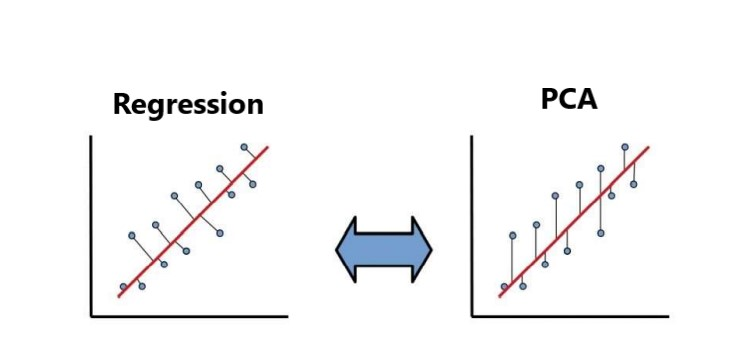

In [1]:
from IPython.display import Image
Image(filename="image_reg_pca.jpg", width=400, height=400)

#### 4. Theoretical example

The next section will work through the steps of how a PCA algorithm works using a toy dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

First, we will begin by creating a random distribution of data in a higher dimensional shape (we arbitrarily, for the sake of example, choose 10 variables).

In [3]:
data = np.random.randint(1, 10, 1000).reshape(100, 10)

The first step in PCA implementation is to find the mean of each variable and then subtract the mean from each respective row. 

For example, you find the mean of the first variable by taking the mean of all the values in the first column, then subtract the values in the first row (axis=0) by the mean of this 
first variable. 

By subtracting the means from each of the dimensions, we will then be left with a dataset that has a mean of zero and is considered "centered."

This is the normalization of our variables.

In [4]:
data_centered = data - np.mean(data, axis = 0)

Construct the covariance matrix.

In [5]:
data_centered_cov = np.cov(data_centered, rowvar=False)

Find the eigenvalues and eigenvectors.

In [6]:
eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)

Take the eigenvalues and eigenvectors and sort them in descending order.

In [7]:
index = np.argsort(eigen_values)[::-1]

sorted_values = eigen_values[index]

sorted_vectors = eigen_vectors[:, index]

Note that these eigenvectors are independent of one another (very low cross-correlation). Thus every principal components are perpendicular to one another (orthogonal).

In [8]:
df = pd.DataFrame(sorted_vectors)
#Pairwise correlation
df.corr(method ='pearson')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.063173,-0.029532,0.040164,0.216715,0.106829,0.135215,-0.041406,0.130633,-0.181307
1,0.063173,1.000000,0.015215,-0.020692,-0.111649,-0.055037,-0.069661,0.021332,-0.067300,0.093407
2,-0.029532,0.015215,1.000000,0.009673,0.052194,0.025729,0.032565,-0.009972,0.031462,-0.043667
3,0.040164,-0.020692,0.009673,1.000000,-0.070985,-0.034992,-0.044290,0.013563,-0.042789,0.059387
4,0.216715,-0.111649,0.052194,-0.070985,1.000000,-0.188805,-0.238973,0.073180,-0.230875,0.320435
5,0.106829,-0.055037,0.025729,-0.034992,-0.188805,1.000000,-0.117801,0.036074,-0.113809,0.157958
6,0.135215,-0.069661,0.032565,-0.044290,-0.238973,-0.117801,1.000000,0.045659,-0.144050,0.199929
7,-0.041406,0.021332,-0.009972,0.013563,0.073180,0.036074,0.045659,1.000000,0.044112,-0.061224
8,0.130633,-0.067300,0.031462,-0.042789,-0.230875,-0.113809,-0.144050,0.044112,1.000000,0.193154
9,-0.181307,0.093407,-0.043667,0.059387,0.320435,0.157958,0.199929,-0.061224,0.193154,1.000000


Determine the amount of components you would like to return from the sorted eigenvalue matrix (we will discuss this later)

In [9]:
#We arbitrarily select 3 components, but you can change that
components = 3

eigvect_subset = sorted_vectors[:, 0:components]

Return the reduce form by matrix multiplying the transpose of the eigenvector subset and transpose of the normalized dataset. Then, transpose the product.

In [10]:
data_pca = (eigvect_subset.T @ data_centered.T).T
#Check if the dimension reduction happened
data_pca.shape

(100, 3)

In [11]:
#Summary function
def principal_component_analysis(data, components):
    """
    Takes a higher dimension dataset and uses PCA to reduce 
    the data to the desired numnber of dimensions
    
    Parameters
    ----------
    data : np.array(ndim=n, size=m)
        observations that were generated 
        by a model or data provided
    components : int
        number of desired components the 
        given data will be reduced to 
    
    Returns
    -------
    PCA_data : np.array(ndim=n, size=components)
        the dataset with reduced dimensions
    """
    data_centered = data - np.mean(data, axis=0)

    data_centered_cov = np.cov(data_centered, rowvar=False)

    eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)

    index = np.argsort(eigen_values)[::-1]
    sorted_values = eigen_values[index]
    sorted_vectors = eigen_vectors[:, index]

    vector_subset = sorted_vectors[:, 0:components]

    PCA_data = (vector_subset.T @ data_centered.T).T

    return PCA_data

At this step, we test whether our function is indeed reducing the dimensions.

In [12]:
# test 
data1 = np.random.randint(1, 10, 50).reshape(10, 5)

ex1 = principal_component_analysis(data1, 3)

ex1.shape

(10, 3)

We now build a function that will return the minimum necessary amount of components needed to explain 95% variance in a given model. 

In this case, 95% variance is an arbitrary selection and the parameter in the function can be altered to any desired level of variance.

However, convention suggests that well fit models explain 95% variance.

In [13]:
total_values = sum(eigen_values)

explained_var = [(i/total_values) for i in sorted(eigen_values,
reverse=True)]

sum_explained = np.cumsum(explained_var)

from bisect import bisect_left

def number_components(sum_explained, desired_var):
    """
    Uses the cumulative sum array of explained variance 
    to interpret how many components are required to meet
    a desired level of modeling variance 
    
    Parameters
    ----------
    sum_explained : np.array()
        uses the sum of all eigen values, takes
        each individual eigenvalue and divides it by 
        a sorted list of eigenvalues to get an 
        array with explained variances, then takes
        the cumulitive sum and returns an array 

    desired_var : int
        the desired variance level which you would 
        like to have your model explain  
    """
    pos = bisect_left(sum_explained, desired_var)
    
    return pos

number_components(sum_explained, .95)

8

Now, let's show graphically how each principal component contributes to explaining the variance.

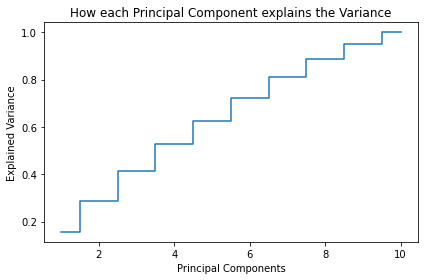

In [14]:
#Cumulative explanation of the variance for the addition of each principal componenet
plt.step(range(1, len(sum_explained)+1), sum_explained,
where='mid', label="Explained Variance")
plt.ylabel("Explained Variance")
plt.xlabel("Principal Components")
plt.title("How each Principal Component explains the Variance")
plt.tight_layout()
plt.show()

We can see that, at the margin, each step explains less of the variance. 

For example, the addition of the first component explains about 15% of the variance. The addition of the last component adds only about 5%-points of explanation of the variance.

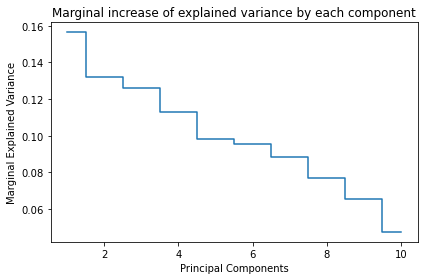

In [15]:
#Marginal explanation of the variance for the addition of each principal componenet
plt.step(range(1, len(explained_var)+1), explained_var,
where='mid', label="Marginal Explained Variance")
plt.ylabel("Marginal Explained Variance")
plt.xlabel("Principal Components")
plt.title("Marginal increase of explained variance by each component")
plt.tight_layout()
plt.show()

#### 5. Application: Image recognition

Let's test the ability of our function, given a set of principal components, of replicating the QuantEcon logo.

First, we will download the packages and get the image from the web.

(163, 310, 4)


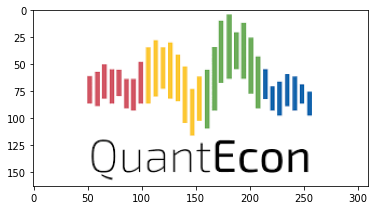

In [16]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np

img = mpimg.imread('quantecon')
print(img.shape)
plt.imshow(img)

Our image is in the form of 163 rows each containing 310 pixels which have 4 channels(RGB). We have to resize the image so that it is in the format required for PCA input. As 310*4=1240, we resize the image to (163, 1240).

Let's use our algorithm (function of principal component analysis) to see how it fits the original image of the QuantEcon logo.

In [24]:
##TODO: THIS IS STILL NEEDS TO BE WORKED ON

img_r = np.reshape(img, (163, 310*4)) 
pca = principal_component_analysis(img_r, 6)
img_transformed = pca.transform(img_r) 
temp = pca.inverse_transform(img_transformed) 
temp = np.reshape(temp, (163, 310 , 4)) 
plt.imshow(temp)


#interact(
#    image_recognition, 
#    Factors=FloatSlider(value=6, min=1, max=32, step=1),
#)

#Transform np array into sklearn.decomposition._pca.PCA

ValueError: cannot reshape array of size 978 into shape (163,1240,4)

Let's use a package to see how it fits the original image of the QuantEcon logo, to see if our function works as well as the package's.

In [28]:
from sklearn.decomposition import PCA
from ipywidgets import interact, FloatSlider

image = img

def image_recognition(Factors):
    img_r = np.reshape(image, (163, 310*4)) 
    pca = PCA(int(Factors)).fit(img_r) 
    img_transformed = pca.transform(img_r) 
    temp = pca.inverse_transform(img_transformed) 
    temp = np.reshape(temp, (163, 310 , 4)) 
    plt.imshow(temp)
    
interact(
    image_recognition, 
    Factors=FloatSlider(value=6, min=1, max=32, step=1),
)

interactive(children=(FloatSlider(value=6.0, description='Factors', max=32.0, min=1.0, step=1.0), Output()), _…

<function __main__.image_recognition(Factors)>

#### 6. References

1. Towards Science: A One-Stop Shop for Principal Component Analysis (https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

2. In Depth: Principal Component Analysis (https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

3. Advanced Data Analysis from an Elementary Point of View (https://www.stat.cmu.edu/~cshalizi/uADA/15/lectures/17.pdf).

4. Applications of Principal Component Analysis (PCA) (https://iq.opengenus.org/applications-of-pca/).